# 시각화를 사용한 공공데이터 분석

## 프로젝트 설정

In [1]:
# 1. 라이브러리 호출
import pandas as pd #표를 다루는 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 2. 시각화 설정
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

# 3. 한글폰트 설정(한글을 사용한다면 반드시 해야 함)
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 4. 해상도
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [2]:
# 데이터 불러오기
df=pd.read_csv("data/part2_상가업소정보_201912_01.csv", sep='|')
# 자료마다 separator가 뭔지 확인하자

## 데이터 확인작업

In [3]:
# 데이터 갯수 확인
df.shape

(573680, 39)

In [4]:
# 첫 부분 확인하셈, 경도 위도 있으니까 이거 지도로 쓸 수 있겠다.
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [5]:
# 끝 부분도 확인해봐
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1144010200101050067001710,NaN,서울특별시 마포구 마포대로14길 4,121801,4211.0,NaN,NaN,NaN,126.955059,37.548618
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,1120011500102890015004255,으뜸프린팅(주),서울특별시 성동구 성수일로8길 37,133834,4794.0,NaN,2,NaN,127.054615,37.545853
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,1168010800101650008000001,한맥빌딩,서울특별시 강남구 강남대로 492,135825,6119.0,NaN,2,NaN,127.024102,37.506202
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,NaN,1,NaN,126.924863,37.525172
573679,16335150,마이리틀네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,1132010700108120000018489,현대타운아파트,서울특별시 도봉구 도봉로114길 22-8,132691,1455.0,101,NaN,NaN,127.035145,37.647099


In [6]:
df.index

RangeIndex(start=0, stop=573680, step=1)

In [7]:
# 컬럼확인하고, 표준산업분류 알아야함.
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [8]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 전처리

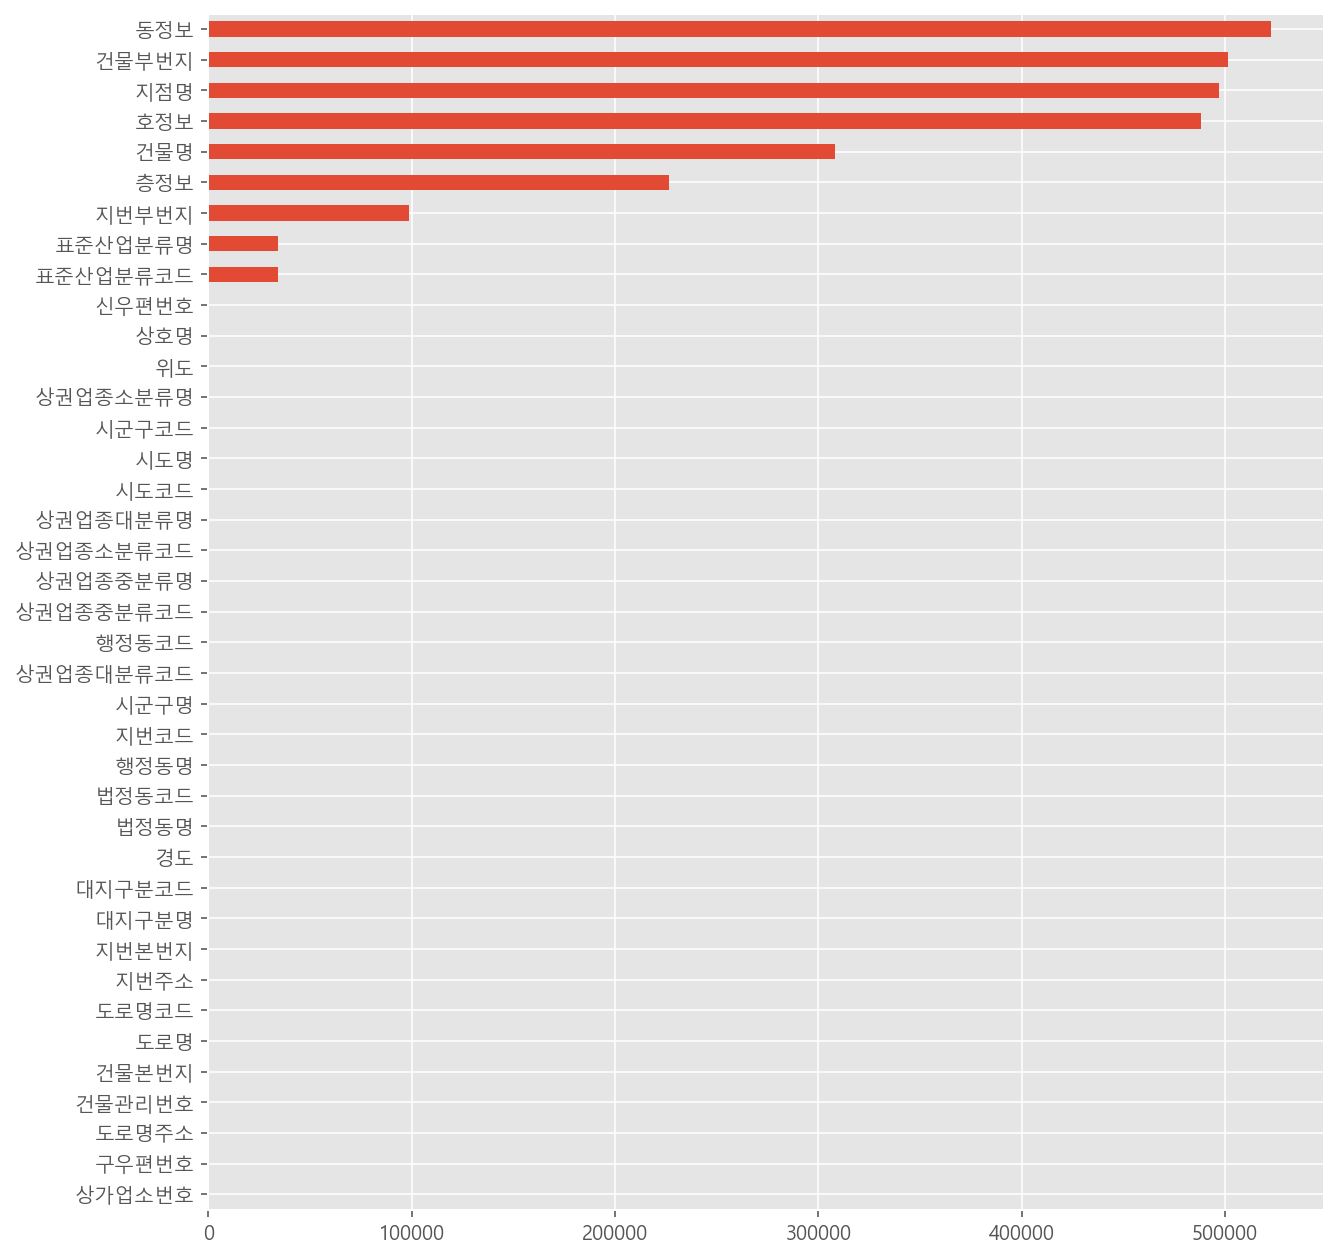

In [9]:
# 시각화가 되어 보기 쉬워짐
# 결측 확인
n=df.isnull().sum()
# n.plot.bar()
n.sort_values().plot.barh(figsize=(10,11)) # 그래프 뒤집음

In [10]:
not_use=n.sort_values(ascending=False).head(9)
not_use_col=not_use.index
df=df.drop(not_use_col, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   상권업종대분류코드  573680 non-null  object 
 3   상권업종대분류명   573680 non-null  object 
 4   상권업종중분류코드  573680 non-null  object 
 5   상권업종중분류명   573680 non-null  object 
 6   상권업종소분류코드  573680 non-null  object 
 7   상권업종소분류명   573680 non-null  object 
 8   시도코드       573680 non-null  int64  
 9   시도명        573680 non-null  object 
 10  시군구코드      573680 non-null  int64  
 11  시군구명       573680 non-null  object 
 12  행정동코드      573680 non-null  int64  
 13  행정동명       573680 non-null  object 
 14  법정동코드      573680 non-null  int64  
 15  법정동명       573680 non-null  object 
 16  지번코드       573680 non-null  int64  
 17  대지구분코드     573680 non-null  int64  
 18  대지구분명      573680 non-null  object 
 19  지번본번지      573680 non-n

In [11]:
cols= df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [12]:
# 코드와 번호가 포함된 컬럼명을 모두 삭제하고 싶습니다.
# 1)코드만 지운다
# 1-1) 컬럼명에 코드가 포함된 글자가 있는 컬럼이 있는지 확인한다.(str.contains)
# 1-2) 확인된 컬럼을 모두 가져온다.
# 1-3) 지운다

# 2)번호만 지운다
# 2-1) 컬럼명에 번호가 포함된 글자가 있는 컬럼이 있는지 확인한다.(str.contains)
# 2-2) 확인된 컬럼을 모두 가져온다.
# 2-3) 지운다

In [13]:
# 인덱스 말고 스트링으로 못바꾸나?
df=df.drop(cols[cols.str.contains("코드|번호")], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   대지구분명     573680 non-null  object 
 9   지번본번지     573680 non-null  int64  
 10  지번주소      573680 non-null  object 
 11  도로명       573680 non-null  object 
 12  건물본번지     573680 non-null  int64  
 13  도로명주소     573680 non-null  object 
 14  경도        573680 non-null  float64
 15  위도        573680 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 70.0+ MB


In [15]:
df[df['시군구명']=='강남구']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
26,쉼터,음식,분식,라면김밥분식,서울특별시,강남구,삼성1동,삼성동,대지,159,서울특별시 강남구 삼성동 159,서울특별시 강남구 봉은사로,524,서울특별시 강남구 봉은사로 524,127.057100,37.512939
27,배제현의웰빙낙지한마리수제비,음식,일식/수산물,낙지/오징어,서울특별시,강남구,신사동,신사동,대지,512,서울특별시 강남구 신사동 512-13,서울특별시 강남구 강남대로152길,19,서울특별시 강남구 강남대로152길 19,127.020945,37.517574
38,타워광명내과의원,의료,병원,내과/외과,서울특별시,강남구,도곡2동,도곡동,대지,467,서울특별시 강남구 도곡동 467-14,서울특별시 강남구 언주로30길,39,서울특별시 강남구 언주로30길 39,127.053198,37.488742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573668,킹덤코리아,소매,음/식료품소매,청과물소매,서울특별시,강남구,역삼2동,역삼동,대지,720,서울특별시 강남구 역삼동 720-9,서울특별시 강남구 테헤란로38길,5,서울특별시 강남구 테헤란로38길 5,127.041635,37.501642
573672,심스틸러,소매,의복의류,캐쥬얼/스포츠의류,서울특별시,강남구,논현1동,논현동,대지,16,서울특별시 강남구 논현동 16-40,서울특별시 강남구 강남대로146길,7,서울특별시 강남구 강남대로146길 7,127.020698,37.514833
573673,밀리온골프,소매,의복의류,캐쥬얼/스포츠의류,서울특별시,강남구,압구정동,신사동,대지,648,서울특별시 강남구 신사동 648-8,서울특별시 강남구 도산대로49길,21,서울특별시 강남구 도산대로49길 21,127.036900,37.524247
573674,헤리티크뉴욕,소매,의복의류,예복/웨딩드레스,서울특별시,강남구,압구정동,신사동,대지,650,서울특별시 강남구 신사동 650-7,서울특별시 강남구 도산대로45길,16,서울특별시 강남구 도산대로45길 16-9,127.036036,37.523645


In [16]:
df_gangnam=df[(df['시군구명']=='강남구')& (df['상권업종대분류명']=='음식')].copy()
df_gangnam['상권업종중분류명'].value_counts()

한식         4371
커피점/카페     2790
유흥주점       1573
양식         1573
일식/수산물     1255
분식         1197
패스트푸드       786
제과제빵떡케익     650
닭/오리요리      539
중식          358
별식/퓨전요리     341
부페           63
기타음식업        47
음식배달서비스      11
Name: 상권업종중분류명, dtype: int64

In [17]:
food_gu=df_gangnam.groupby(['상권업종중분류명'])['상호명'].count()
food_gu

상권업종중분류명
기타음식업        47
닭/오리요리      539
별식/퓨전요리     341
부페           63
분식         1197
양식         1573
유흥주점       1573
음식배달서비스      11
일식/수산물     1255
제과제빵떡케익     650
중식          358
커피점/카페     2790
패스트푸드       786
한식         4371
Name: 상호명, dtype: int64

In [18]:
food=food_gu.reset_index() # 표가 아니라 출력할 수가 없음
food=food.rename(columns={'상호명':'상호수'})
food

,상권업종중분류명,상호수
0,기타음식업,47
1,닭/오리요리,539
2,별식/퓨전요리,341
3,부페,63
4,분식,1197
5,양식,1573
6,유흥주점,1573
7,음식배달서비스,11
8,일식/수산물,1255
9,제과제빵떡케익,650


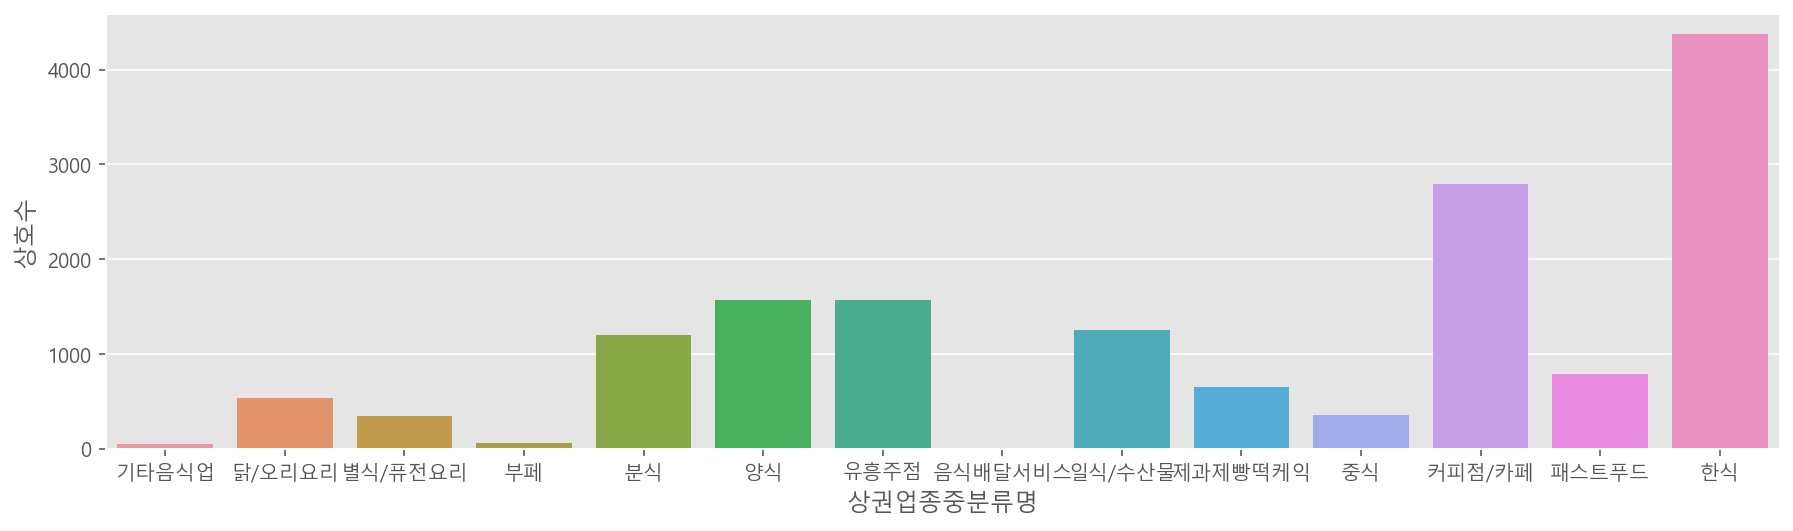

In [19]:
plt.figure(figsize=(15,4))
sns.barplot(data=food,x='상권업종중분류명',y='상호수')
# matplot보다 훨씬 간단함
plt.show()

## 기술 통계 값 확인

In [21]:
# 기술 통계
df.describe()
df[["위도", "경도"]].describe()

,위도,경도
count,573680.000000,573680.000000
mean,36.854698,127.596287
std,1.081285,0.941262
min,35.006760,126.768169
25%,35.215422,126.968316
50%,37.511207,127.047672
75%,37.560362,128.986938
max,37.692398,129.292243


In [22]:
# 상관계수
corr = df.corr()
corr

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.057987,0.182678,-0.196658
건물본번지,0.057987,1.000000,0.000255,0.004606
경도,0.182678,0.000255,1.000000,-0.994711
위도,-0.196658,0.004606,-0.994711,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


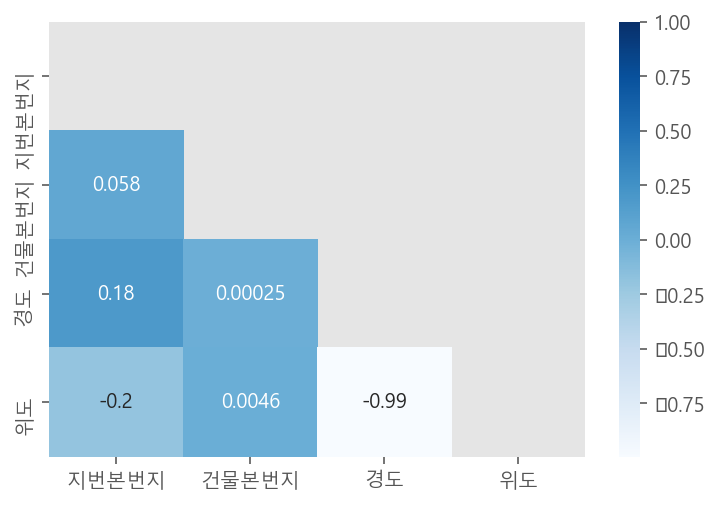

In [28]:
# 상관계수 시각화
import numpy as np
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask)

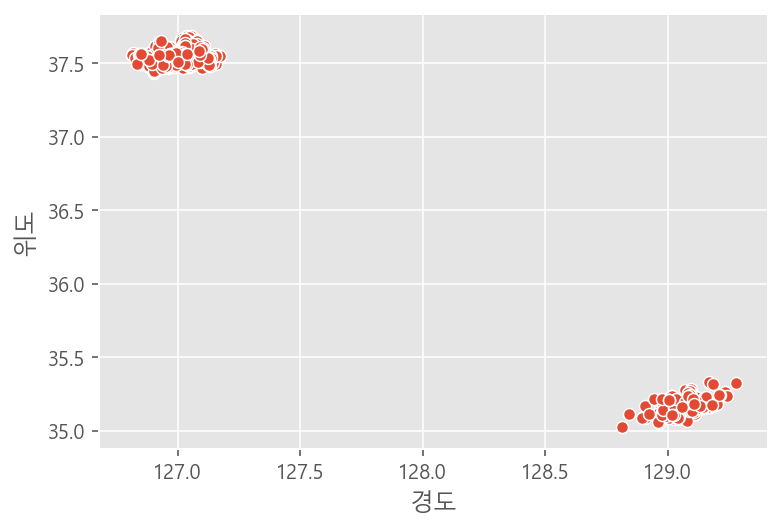

In [29]:
# 산점도(수치)
sns.scatterplot(data=df.sample(1000), x="경도", y="위도")

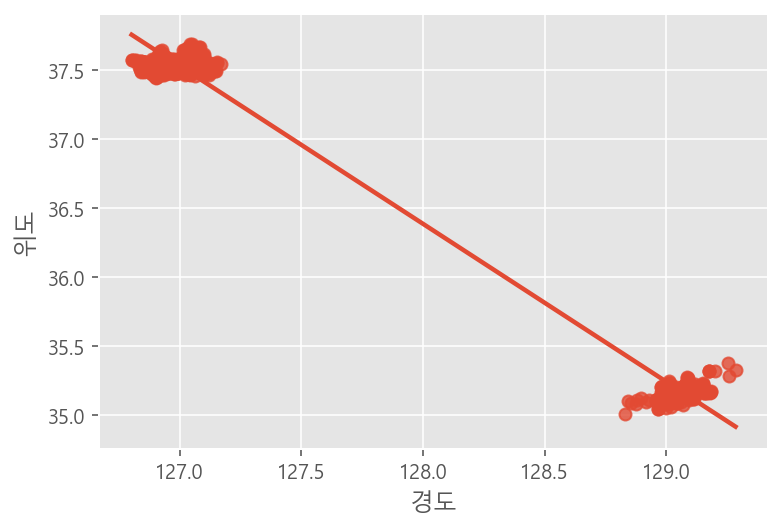

In [30]:
# 회귀선
sns.regplot(data=df.sample(1000), x="경도", y="위도")

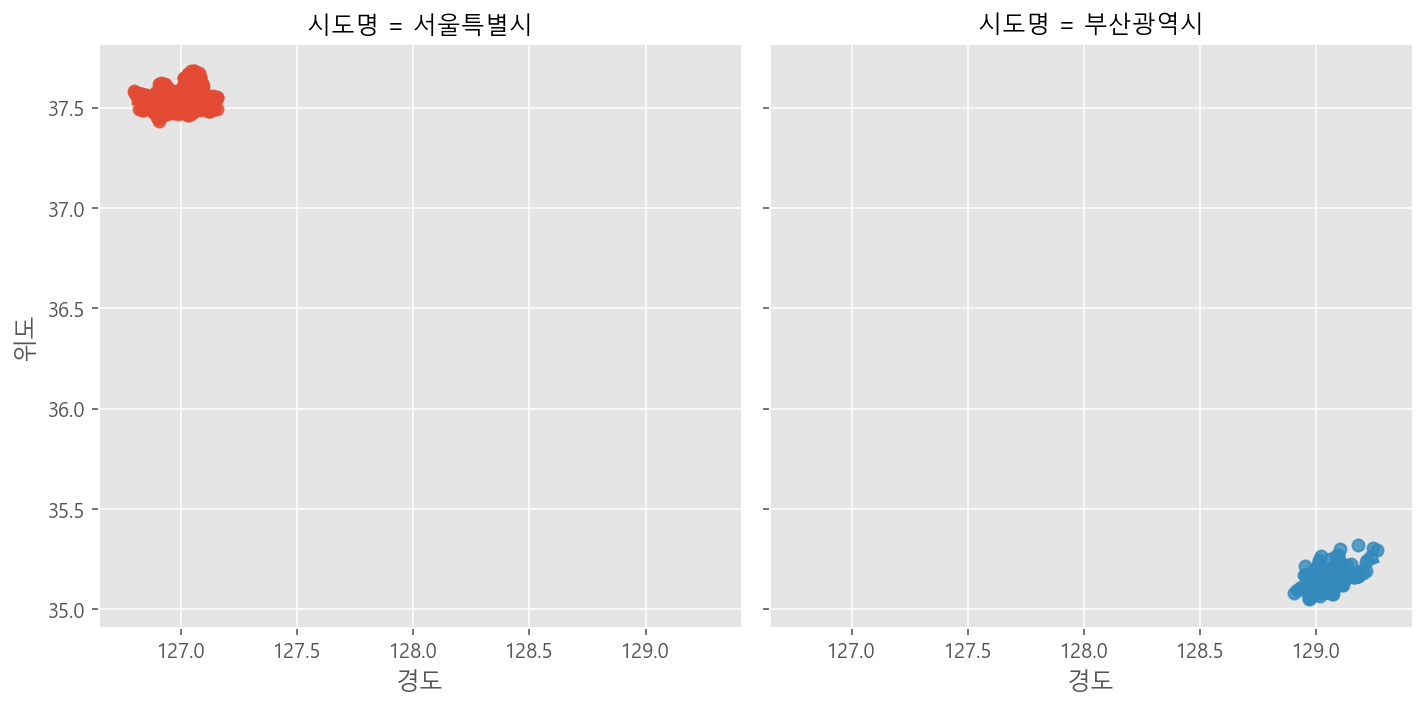

In [31]:
# 서브플롯
sns.lmplot(data=df.sample(1000), x="경도", y="위도", hue="시도명", col="시도명", fit_reg=True)